# Лабораторная работа №8
## Работа с интерактивными блокнотами и файлами

**Задачи лабораторной работы:**
- Считать данные из Excel-файла с результатами студентов. 
- Выполнить вычисления (средние, максимальные, групповые показатели). Построить столбчатые диаграммы по заданным вариантам. 
- Подписать оси, добавить заголовки и легенды к графикам. 
- Сохранить результаты и визуализации в Jupyter Notebook. 

**Цели:**
- Освоить работу с Excel-файлами средствами Python
- Научиться использовать библиотеку openpyxl
- Научиться строить столбчатые диаграммы с помощью matplotlib

In [1]:
# Импорт необходимых библиотек, 5 вариант Кульбицкий Кирилл
import openpyxl
import matplotlib.pyplot as plt
import numpy as np

# Настройка отображения графиков в блокноте
%matplotlib inline

print("Библиотеки успешно импортированы")

Matplotlib is building the font cache; this may take a moment.


Библиотеки успешно импортированы


In [4]:
# Загрузка данных из Excel файла, 5 вариант Кульбицкий Кирилл
try:
    workbook = openpyxl.load_workbook('data/students.xlsx')
    sheet_ocenki = workbook['Оценки']
    print("Файл students.xlsx успешно загружен")
    
    # Проверяем структуру данных
    print("Структура данных:")
    print(f"Всего строк: {sheet_ocenki.max_row}")
    print(f"Всего столбцов: {sheet_ocenki.max_column}")
    
    # Покажем заголовки и первые 5 строк для проверки
    print("Первые 5 строк данных:")
    for row in sheet_ocenki.iter_rows(max_row=6, values_only=True):
        print(row)
        
except Exception as e:
    print(f"Ошибка при загрузке файла: {e}")

Файл students.xlsx успешно загружен
Структура данных:
Всего строк: 108
Всего столбцов: 4
Первые 5 строк данных:
('ФИО', 'Математика', 'Физика', 'Информатика')
('Иванов И.И.', 8, 7, 10)
('Петров П.П.', 7, 8, 9)
('Сидоров С.С.', 9, 6, 8)
('Кузнецов К.К.', 6, 9, 7)
('Смирнов С.С.', 10, 7, 9)


In [5]:
# Извлечение данных об оценках по предметам, 5 вариант Кульбицкий Кирилл
students_names = []
math_grades = []
physics_grades = []
informatics_grades = []

# Начинаем со второй строки (пропускаем заголовок)
for row in sheet_ocenki.iter_rows(min_row=2, values_only=True):
    students_names.append(row[0])
    math_grades.append(row[1])
    physics_grades.append(row[2])
    informatics_grades.append(row[3])

print("Данные успешно извлечены:")
print(f"Количество студентов: {len(students_names)}")
print(f"Оценки по математике (первые 10): {math_grades[:10]}")
print(f"Оценки по физике (первые 10): {physics_grades[:10]}")
print(f"Оценки по информатике (первые 10): {informatics_grades[:10]}")

Данные успешно извлечены:
Количество студентов: 107
Оценки по математике (первые 10): [8, 7, 9, 6, 10, 7, 8, 4, 10, 5]
Оценки по физике (первые 10): [7, 8, 6, 9, 7, 8, 9, 10, 7, 3]
Оценки по информатике (первые 10): [10, 9, 8, 7, 9, 10, 8, 8, 9, 6]


In [6]:
# Вычисление среднего балла по каждому предмету, 5 вариант Кульбицкий Кирилл
math_avg = sum(math_grades) / len(math_grades)
physics_avg = sum(physics_grades) / len(physics_grades)
informatics_avg = sum(informatics_grades) / len(informatics_grades)

print("РЕЗУЛЬТАТЫ ВЫЧИСЛЕНИЙ:")
print("=" * 50)
print(f"Математика:")
print(f"   Всего оценок: {len(math_grades)}")
print(f"   Сумма оценок: {sum(math_grades)}")
print(f"   Средний балл: {math_avg:.2f}")

print(f"Физика:")
print(f"   Всего оценок: {len(physics_grades)}")
print(f"   Сумма оценок: {sum(physics_grades)}")
print(f"   Средний балл: {physics_avg:.2f}")

print(f"Информатика:")
print(f"   Всего оценок: {len(informatics_grades)}")
print(f"   Сумма оценок: {sum(informatics_grades)}")
print(f"   Средний балл: {informatics_avg:.2f}")
print("=" * 50)

# Создаем списки для построения графика
subjects = ['Математика', 'Физика', 'Информатика']
averages = [math_avg, physics_avg, informatics_avg]

print("Данные для графика:")
for subject, avg in zip(subjects, averages):
    print(f"   {subject}: {avg:.2f}")

РЕЗУЛЬТАТЫ ВЫЧИСЛЕНИЙ:
Математика:
   Всего оценок: 107
   Сумма оценок: 697
   Средний балл: 6.51
Физика:
   Всего оценок: 107
   Сумма оценок: 748
   Средний балл: 6.99
Информатика:
   Всего оценок: 107
   Сумма оценок: 831
   Средний балл: 7.77
Данные для графика:
   Математика: 6.51
   Физика: 6.99
   Информатика: 7.77


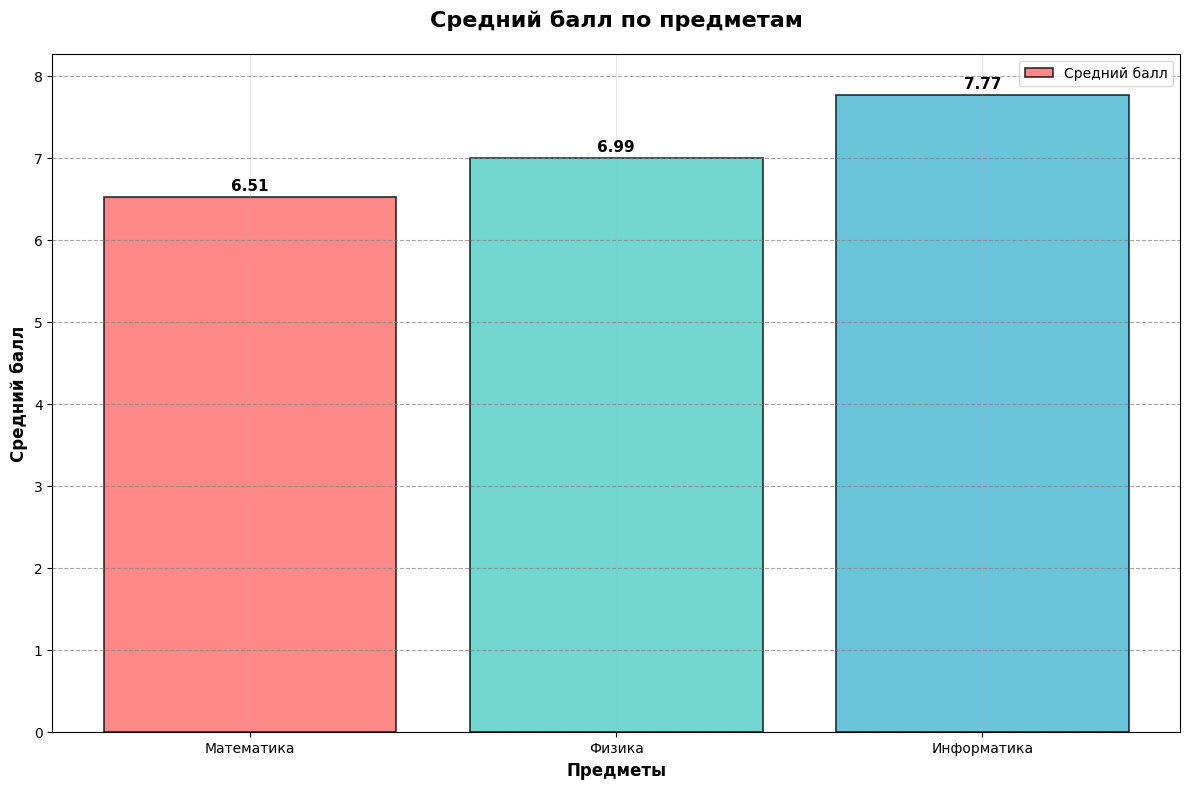

Столбчатая диаграмма успешно построена


In [7]:
# Построение столбчатой диаграммы, 5 вариант Кульбицкий Кирилл
plt.figure(figsize=(12, 8))

# Создаем столбцы с разными цветами
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
bars = plt.bar(subjects, averages, color=colors, edgecolor='black', linewidth=1.2, alpha=0.8)

# Настройка оформления графика
plt.title('Средний балл по предметам', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Предметы', fontsize=12, fontweight='bold')
plt.ylabel('Средний балл', fontsize=12, fontweight='bold')

# Добавляем значения на столбцы
for bar, value in zip(bars, averages):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, 
             f'{value:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# Настройка сетки
plt.grid(axis='y', linestyle='--', alpha=0.7, color='gray')
plt.grid(axis='x', alpha=0.3)

# Настройка осей
plt.ylim(0, max(averages) + 0.5)

# Добавляем легенду
plt.legend(['Средний балл'], loc='upper right')

# Улучшаем читаемость
plt.tight_layout()

# Показываем график
plt.show()

print("Столбчатая диаграмма успешно построена")

In [8]:
# Дополнительный анализ данных, 5 вариант Кульбицкий Кирилл
print("ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ:")
print("=" * 40)

# Находим предмет с наивысшим средним баллом
max_avg_subject = subjects[averages.index(max(averages))]
min_avg_subject = subjects[averages.index(min(averages))]

print(f"Предмет с наивысшим средним баллом: {max_avg_subject} ({max(averages):.2f})")
print(f"Предмет с наименьшим средним баллом: {min_avg_subject} ({min(averages):.2f})")

# Разница между максимальным и минимальным средним баллом
diff = max(averages) - min(averages)
print(f"Разница между предметами: {diff:.2f} балла")

print("Статистика по всем предметам:")
print(f"   Общий средний балл: {sum(averages)/3:.2f}")
print(f"   Диапазон оценок: от {min(averages):.2f} до {max(averages):.2f}")

ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ:
Предмет с наивысшим средним баллом: Информатика (7.77)
Предмет с наименьшим средним баллом: Математика (6.51)
Разница между предметами: 1.25 балла
Статистика по всем предметам:
   Общий средний балл: 7.09
   Диапазон оценок: от 6.51 до 7.77


In [9]:
# Сохранение результатов в новый Excel файл, 5 вариант Кульбицкий Кирилл
try:
    # Создаем новую книгу
    result_workbook = openpyxl.Workbook()
    result_sheet = result_workbook.active
    result_sheet.title = "Результаты анализа"
    
    # Заголовки
    result_sheet['A1'] = 'ПРЕДМЕТ'
    result_sheet['B1'] = 'СРЕДНИЙ БАЛЛ'
    result_sheet['C1'] = 'КОЛИЧЕСТВО ОЦЕНОК'
    result_sheet['D1'] = 'СУММА ОЦЕНОК'
    
    # Данные по предметам
    result_sheet['A2'] = 'Математика'
    result_sheet['B2'] = round(math_avg, 2)
    result_sheet['C2'] = len(math_grades)
    result_sheet['D2'] = sum(math_grades)
    
    result_sheet['A3'] = 'Физика'
    result_sheet['B3'] = round(physics_avg, 2)
    result_sheet['C3'] = len(physics_grades)
    result_sheet['D3'] = sum(physics_grades)
    
    result_sheet['A4'] = 'Информатика'
    result_sheet['B4'] = round(informatics_avg, 2)
    result_sheet['C4'] = len(informatics_grades)
    result_sheet['D4'] = sum(informatics_grades)
    
    # Итоговая строка
    result_sheet['A5'] = 'ОБЩИЙ СРЕДНИЙ'
    result_sheet['B5'] = round(sum(averages)/3, 2)
    
    # Сохраняем файл
    result_workbook.save('data/students_result.xlsx')
    
    print("Результаты успешно сохранены в файл: data/students_result.xlsx")
    
    # Покажем сохраненные данные
    print("Сохраненные данные:")
    for row in result_sheet.iter_rows(values_only=True):
        print(f"   {row[0]}: {row[1]}")
        
except Exception as e:
    print(f"Ошибка при сохранении файла: {e}")

Результаты успешно сохранены в файл: data/students_result.xlsx
Сохраненные данные:
   ПРЕДМЕТ: СРЕДНИЙ БАЛЛ
   Математика: 6.51
   Физика: 6.99
   Информатика: 7.77
   ОБЩИЙ СРЕДНИЙ: 7.09
